## NONLINEARREGRESSION/NONLINEAR REGRESSION PART 1 EXERCISE  ##
#### Exercise 1 ####


## NONLINEARREGRESSION/NONLINEAR REGRESSION PART 2 EXERCISE  ##
#### Exercise 2 ####


## NONLINEARREGRESSION/NONLINEAR REGRESSION PART 3 EXERCISE  ##
#### Exercise 3 ####


## NONLINEARREGRESSION/NONLINEAR REGRESSION PART 4 EXERCISE  ##
#### Exercise 4 ####
#### Exercise 1
#### Task 1
##### Import the packages required to analyze data with log-log models, log-lin models, polynomial models, and interactions in the predictor variables.
##### Set the working directory to data directory.
##### Print the working directory.
#### Result:


In [1]:
import os
import pandas as pd
import numpy as np
from pathlib import Path
import matplotlib.pyplot as plt
import statsmodels.api as sm
import statsmodels.formula.api as smf
# Set 'main_dir' to location of the project folder
from pathlib import Path
home_dir = Path(".").resolve().parent
main_dir = str(home_dir) + '/2'
print(main_dir)
data_dir = str(main_dir) + "/data"
print(data_dir)
# Set working directory.
os.chdir(data_dir)
print(os.listdir(str(data_dir)))

# Check working directory.
print(os.getcwd())


/home/jovyan/TEDS-Jul2022/2
/home/jovyan/TEDS-Jul2022/2/data
['insurance.csv', '.ipynb_checkpoints', 'beer-sold-by-price.csv', 'ChemicalManufacturingProcess.csv']
/home/jovyan/TEDS-Jul2022/2/data


#### Task 2
##### Load `beer-sold-by-price.csv` and save as `ex_data_loglog`.
##### The data consists of 52 weeks of cases sold and the price per case of 18-packs of beer at a small chain of supermarkets. 
##### We want to build a regression model that can predict `quantity of cases sold` according to the changes in the `price`.
##### Check the shape of the data, print the first few rows, and check for any missing values. 
##### For convenience, change the column names from `PRICE 18PK`, `CASES 18PK` to `Price`, `Quantity`.
##### Lastly, sort the dataframe by `Price`.
#### Result:


In [45]:
print(os.listdir())
ex_data_loglog = pd.read_csv(str(data_dir) + '/beer-sold-by-price.csv')
ex_data_loglog.shape
ex_data_loglog.head()
ex_data_loglog.isnull().values.any()
ex_data_loglog=ex_data_loglog.rename(columns={'PRICE 18PK':'Price', 'CASES 18PK':'Quantity'})
ex_data_loglog.head()
ex_data_loglog.sort_values(by=['Price'], inplace = True)


['insurance.csv', 'diabetes.csv', 'loglin.csv', '.ipynb_checkpoints', 'beer-sold-by-price.csv', 'ChemicalManufacturingProcess.csv']


#### Task 3
##### Transform the values of our predictor and target variable to the log of the actual values. 
##### Name the log values column as `price_log` and `quantity_log`.
##### Print out the first few rows to check.
#### Result:


In [46]:
ex_data_loglog['price_log'] = np.log1p(ex_data_loglog['Price'])
ex_data_loglog['quantity_log'] = np.log1p(ex_data_loglog['Quantity'])

#### Task 4
##### Add a constant to the dataframe.
#### Result:


In [47]:
ex_data_loglog['const'] = np.ones([ex_data_loglog.shape[0],1])
ex_data_loglog

,Price,Quantity,price_log,quantity_log,const
50,13.26,493,2.657458,6.202536,1.0
47,13.45,741,2.670694,6.609349,1.0
28,13.49,890,2.673459,6.792344,1.0
31,13.67,775,2.685805,6.654153,1.0
46,13.76,523,2.691921,6.261492,1.0
39,13.79,817,2.693951,6.706862,1.0
27,13.79,544,2.693951,6.300786,1.0
42,13.85,460,2.698000,6.133398,1.0
16,13.87,456,2.699346,6.124683,1.0
12,13.87,404,2.699346,6.003887,1.0


#### Task 5
##### Fit the model using `sm.OLS` and pass the columns we transformed to log in the previous tasks.
##### Name the model `ex_loglog`.
#### Result:


In [48]:
y = ex_data_loglog[['quantity_log']]
X = ex_data_loglog[['const','price_log']]
ex_loglog = sm.OLS(y,X).fit()

#### Task 6
##### Use the fitted log-log model to predict. 
##### Save the predictions as `ex_prediction_loglog`.
##### Take a look at the first 10 rows of the predictions.
#### Result:


In [49]:
ex_prediction_loglog = ex_loglog.predict(X)
ex_prediction_loglog.head(10)

50    6.495929
47    6.402347
28    6.382803
31    6.295515
46    6.252272
39    6.237917
27    6.237917
42    6.209292
16    6.199777
12    6.199777
dtype: float64

#### Task 7
##### Exponentiate the predictions and save as `ex_prediction`.
##### Print the first 10 rows of `ex_prediction`.
#### Result:


In [50]:
ex_prediction = np.expm1(ex_prediction_loglog)
ex_prediction.head(10)

50    661.439031
47    602.259453
28    590.583552
31    541.135198
46    518.191332
39    510.791201
27    510.791201
42    496.349205
16    491.639002
12    491.639002
dtype: float64

#### Task 8
##### Create a scatterplot of the actual values of `quantity` and the predicted values of `quantity`. 
##### Plot the actual quantity as the scatter points and the predicted quantity as a red line to compare.
#### Result:


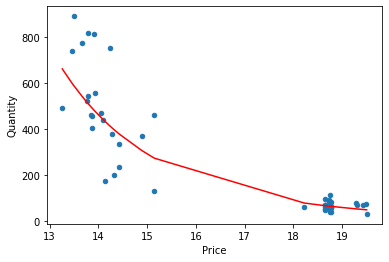

In [51]:
ex_data_loglog.plot(kind = 'scatter', x = 'Price' , y = 'Quantity')
plt.plot(ex_data_loglog['Price'],ex_prediction, color = 'r')

#### Task 9
##### Get the residuals and put them into a dataframe called `ex_loglog_results`, along with the actual values of `quantity` and the exponentiated predictions of `quantity`.
##### Using the RMSE function, get the RMSE of our log-log model.


In [52]:
def rmse(prediction,actual):
    return np.sqrt(((prediction-actual) ** 2).mean())


#### Result:


In [53]:
actual = ex_data_loglog['Quantity']
predicted = ex_prediction

residuals = actual - predicted

ex_loglog_resuts = pd.DataFrame({'actual':actual,'predicted':predicted,'residuals':residuals})
ex_loglog_resuts

,actual,predicted,residuals
50,493,661.439031,-168.439031
47,741,602.259453,138.740547
28,890,590.583552,299.416448
31,775,541.135198,233.864802
46,523,518.191332,4.808668
39,817,510.791201,306.208799
27,544,510.791201,33.208799
42,460,496.349205,-36.349205
16,456,491.639002,-35.639002
12,404,491.639002,-87.639002


In [54]:
rmse(actual,predicted)

118.39512505226527

#### Task 10
##### Build a standard linear model with the dataset, and get a plot of `actual vs.predicted`.
##### Compare the plot with our previous log-log model plot.
#### Result:


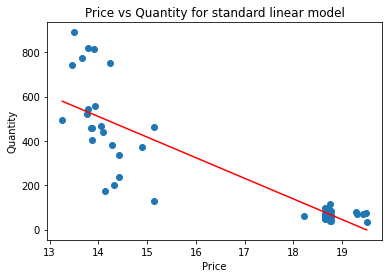

In [55]:
# Fit the model.
model_lin = sm.OLS(ex_data_loglog['Quantity'], ex_data_loglog.loc[:,['const','Price']]).fit()
prediction = model_lin.predict(ex_data_loglog.loc[:,['const','Price']])
plt.scatter(ex_data_loglog['Price'],ex_data_loglog['Quantity'])
plt.plot(ex_data_loglog['Price'], prediction, 'red')
plt.title("Price vs Quantity for standard linear model")
plt.xlabel("Price")
plt.ylabel("Quantity")
plt.show()


#### Exercise 2
#### Task 1
##### Load `loglin.csv` and save as `ex_data_loglin`.
##### The data consists of 200 weeks of stock data. 
##### We want to build a regression model that can predict `stock price` according to the changes in the `day`.
##### Check the shape of the data, print the first few rows, and check for any missing values. 
#### Result:


In [56]:
print(os.listdir())
ex_data_loglin = pd.read_csv(str(data_dir) + '/loglin.csv')
print(f'shape: {ex_data_loglin.shape}')
print(ex_data_loglin.head(10))
ex_data_loglin.isnull().values.any()
#ex_data_loglog=ex_data_loglog.rename(columns={'PRICE 18PK':'Price', 'CASES 18PK':'Quantity'})
ex_data_loglin.head()
ex_data_loglin.sort_values(by=['Day'], inplace = True)


['insurance.csv', 'diabetes.csv', 'loglin.csv', '.ipynb_checkpoints', 'beer-sold-by-price.csv', 'ChemicalManufacturingProcess.csv']
shape: (504, 2)
   Day  Stock Price
0    1       105.26
1    2       105.35
2    3       102.71
3    4       100.70
4    5        96.45
5    6        96.96
6    7        98.53
7    8        99.96
8    9        97.39
9   10        99.52


#### Task 2
##### We need to transform the values of our target variable to the log of the actual values. 
##### Name the log values column as `price_log`.
##### Print out the first few rows to check.
#### Result:


In [57]:
ex_data_loglin['price_log'] = np.log1p(ex_data_loglin['Stock Price'])
ex_data_loglin = sm.add_constant(ex_data_loglin)
ex_data_loglin.head(10)

,const,Day,Stock Price,price_log
0,1.0,1,105.26,4.665889
1,1.0,2,105.35,4.666736
2,1.0,3,102.71,4.641599
3,1.0,4,100.70,4.622027
4,1.0,5,96.45,4.579339
5,1.0,6,96.96,4.584559
6,1.0,7,98.53,4.600459
7,1.0,8,99.96,4.614724
8,1.0,9,97.39,4.588939
9,1.0,10,99.52,4.610357


#### Task 3
##### Add a constant to the dataframe.
#### Result:


In [58]:
# done above

#### Task 4
##### Fit the model using `sm.OLS` and pass the target column (which we transformed to log in the previous task), the predictor column (which is `Day`), and the constant.
##### Name the model `ex_loglin`.
#### Result:


In [59]:
y = ex_data_loglin['price_log']
X = ex_data_loglin[['const','Day']]
ex_loglin = sm.OLS(y,X).fit()

#### Task 5
##### Use the fitted log-lin model to predict. 
##### Save the predictions as `ex_prediction_loglin`.
##### Take a look at the first 10 rows of the predictions.
#### Result:


In [60]:
ex_prediction_loglin = ex_loglin.predict(X)
ex_prediction_loglin.head(10)

0    4.506499
1    4.507809
2    4.509119
3    4.510429
4    4.511738
5    4.513048
6    4.514358
7    4.515668
8    4.516977
9    4.518287
dtype: float64

#### Task 6
##### Exponentiate the predictions and save as `ex_prediction`.
##### Print the first 10 rows of `ex_prediction`.
#### Result:


In [61]:
ex_prediction = np.expm1(ex_prediction_loglin)
ex_prediction.head(10)

0    89.604081
1    89.722830
2    89.841734
3    89.960795
4    90.080011
5    90.199384
6    90.318913
7    90.438599
8    90.558442
9    90.678442
dtype: float64

#### Task 7
##### Create a scatterplot of the actual values of `Stock Price` and the predicted values of `Stock Price`. 
##### Plot the actual stock price as the scatter points and the predicted stock price as a red line to compare.
#### Result:


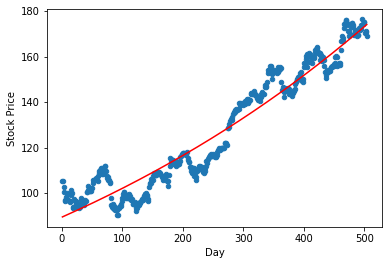

In [62]:
ex_data_loglin.plot(kind = 'scatter', x = 'Day', y = 'Stock Price')
plt.plot(ex_data_loglin['Day'],ex_prediction, color = 'r')

#### Task 8
##### Get the residuals and put them into a dataframe called `ex_loglin_results`, along with the actual values of `Stock Price` and the exponentiated predictions of `Stock Price`.
##### Using the RMSE function, get the RMSE of our log-lin model.


In [63]:
def rmse(predictions,actual):
    return np.sqrt(((prediction-actual) ** 2).mean())


#### Result:


In [64]:
actual = ex_data_loglin['Stock Price']
predicted = ex_prediction

residuals = actual - predicted

ex_loglin_resuts = pd.DataFrame({'actual':actual,'predicted':predicted,'residuals':residuals})
ex_loglin_resuts

,actual,predicted,residuals
0,105.26,89.604081,15.655919
1,105.35,89.722830,15.627170
2,102.71,89.841734,12.868266
3,100.70,89.960795,10.739205
4,96.45,90.080011,6.369989
...,...,...,...
499,175.01,173.178112,1.831888
500,170.57,173.406396,-2.836396
501,170.60,173.634980,-3.034980
502,171.08,173.863863,-2.783863


In [65]:
rmse(actual,predicted)

275.5042632773323

#### Task 9
##### Build a standard linear model with the dataset, and get a plot of `actual vs.predicted`.
##### Compare the plot with our previous plot of the log-lin model.
##### Try calculating the RMSE for a more accurate comparison.
#### Result:


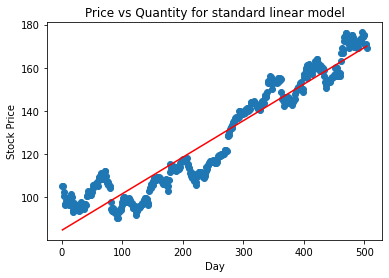

In [66]:
# Fit the model.
model_lin = sm.OLS(ex_data_loglin['Stock Price'], X).fit()
prediction = model_lin.predict(X)

plt.scatter(ex_data_loglin['Day'],ex_data_loglin['Stock Price'])
plt.plot(ex_data_loglin['Day'], prediction, 'red')
plt.title("Price vs Quantity for standard linear model")
plt.xlabel("Day")
plt.ylabel("Stock Price")
plt.show()


#### Exercise 3
#### Task 1
##### Load `poly-data.csv` and save as `ex_data_poly`.
##### This is a dataset generated to show 150 data points exhibiting a polynomial relationship.
##### Check the shape of the data, print the first few rows, and check for any missing values. 
##### Sort the dataframe according to `x`.
#### Result:


In [67]:
print(os.listdir())
ex_data_poly = pd.read_csv(str(data_dir) + '/poly-data.csv')
ex_data_poly.shape


['insurance.csv', 'diabetes.csv', 'loglin.csv', '.ipynb_checkpoints', 'beer-sold-by-price.csv', 'ChemicalManufacturingProcess.csv', 'poly-data.csv']


(150, 2)

In [69]:
ex_data_poly.isnull().values.any()
ex_data_poly.sort_values(by=['x'], inplace = True)
print(ex_data_poly.head(10))


            x         y
129  0.005676 -0.098644
42   0.005998  1.091955
108  0.012313 -0.202702
141  0.016256 -0.389729
140  0.018529  0.212417
96   0.045366  0.307565
24   0.055491  0.319058
91   0.062518  0.378431
10   0.088090  0.196870
29   0.090890  1.381154


#### Task 2
##### Using `np.power()`, add two new predictors called `x2` and `x3`.
##### Print out the first few rows with the new predictors.
#### Result:


In [82]:
ex_data_poly['x2'] = np.power(ex_data_poly['x'],2)
ex_data_poly['x3'] = np.power(ex_data_poly['x'],3)
ex_data_poly['const'] = np.power(ex_data_poly['x'],0)
ex_data_poly.head(10)



,x,y,x2,x3,const,prediction
129,0.005676,-0.098644,0.000032,1.829024e-07,1.0,-0.097369
42,0.005998,1.091955,0.000036,2.157555e-07,1.0,-0.093715
108,0.012313,-0.202702,0.000152,1.866939e-06,1.0,-0.023304
141,0.016256,-0.389729,0.000264,4.295415e-06,1.0,0.019291
140,0.018529,0.212417,0.000343,6.361774e-06,1.0,0.043389
96,0.045366,0.307565,0.002058,9.336406e-05,1.0,0.302458
24,0.055491,0.319058,0.003079,1.708698e-04,1.0,0.388395
91,0.062518,0.378431,0.003909,2.443535e-04,1.0,0.444356
10,0.088090,0.196870,0.007760,6.835690e-04,1.0,0.623348
29,0.090890,1.381154,0.008261,7.508517e-04,1.0,0.640664


#### Task 3
##### Add a constant to our data and fit the model using `sm.OLS`. 
##### Name the fitted model as `ex_model_poly`.
#### Result:


In [83]:
y = ex_data_poly['y']
X = ex_data_poly[['const','x','x2','x3']]
ex_model_poly = sm.OLS(y,X).fit()
ex_prediction_poly = ex_model_poly.predict(X)
ex_data_poly['prediction'] = ex_prediction_poly
ex_prediction_poly.head(10)


129   -0.097369
42    -0.093715
108   -0.023304
141    0.019291
140    0.043389
96     0.302458
24     0.388395
91     0.444356
10     0.623348
29     0.640664
dtype: float64

#### Task 4
##### Using `ex_model_poly` model, predict the target using `x`, `x2`, and `x3` as predictors.
##### Save the predictions as `ex_prediction_poly`.
##### Print the first ten rows of the predictions.
#### Result:


In [84]:
# done above

#### Task 5
##### Create a plot that shows the actual values of `y` and the predicted values of `y`. 
##### Plot the actual points of `y` as scatter points and the predicted values of `y` as a red line. 
#### Result:


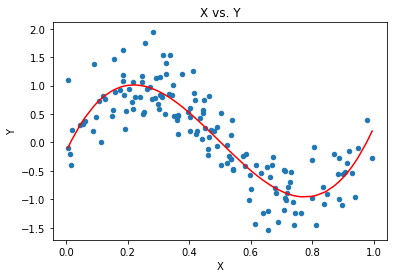

In [85]:
ex_data_poly.plot(kind = 'scatter', x = 'x', y = 'y')
plt.plot(X['x'], ex_prediction_poly, 'red')
plt.title("X vs. Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()


#### Task 6
##### Get the residuals and put them into a dataframe called `ex_poly_results`, along with the actual values of `y` and the predictions of `y`.
##### Using the RMSE function, get the RMSE of our polynomial model.


#### Result:  


In [90]:
actual = y
predicted = ex_data_poly['prediction']
residuals = actual - predicted
ex_poly_results = [{'actual':actual,'predicted':predicted,'residuals':residuals}]
rmse(actual,predicted)

97.73273831935217

#### Task 7
##### Build a standard linear model and plot `actual vs predicted` to see how the model would have performed.
##### Compare this plot with the previous plot we made with polynomial terms added in.
#### Result:


In [96]:
model_lin = sm.OLS(ex_data_poly['y'], ex_data_poly['x']).fit()



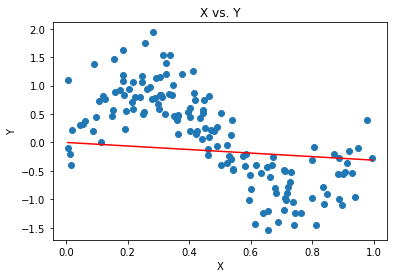

In [101]:
prediction = model_lin.predict(ex_data_poly['x'])

#lin_model = sm.OLS(y,X['x']).fit()
#prediction = lin_model.predicted(X['x'])


plt.scatter(ex_data_poly['x'],ex_data_poly['y'])

plt.plot(ex_data_poly['x'], prediction, 'red')
plt.title("X vs. Y")
plt.xlabel("X")
plt.ylabel("Y")
plt.show()

#### Exercise 4
#### Task 1
##### Load the `interaction-data.csv` as `ex_interaction`. 
##### This is a dataset that predicts `Income` with `Illiteracy` and `High School Graduate Percentage` as predictors.
##### Check the shape of `ex_interaction` and print the first few rows to see what the dataset looks like. 
##### Check if there are any missing values in the dataset. 
#### Result:


In [103]:
print(os.listdir())
ex_interaction = pd.read_csv(str(data_dir) + '/interaction-data.csv')
ex_interaction.shape


['insurance.csv', 'diabetes.csv', 'interaction-data.csv', 'loglin.csv', '.ipynb_checkpoints', 'beer-sold-by-price.csv', 'ChemicalManufacturingProcess.csv', 'poly-data.csv']


(50, 3)

#### Task 2
##### Add the interaction term between `Illiteracy` and `HS Grad` as `illiteracy:hsgrad`.
##### Take a look at the first few rows again.
#### Result:


In [110]:
ex_interaction['const'] = np.ones([ex_interaction.shape[0],1])
ex_interaction['illiteracy:hsgrad'] = ex_interaction['Illiteracy'] * ex_interaction['HS Grad']
ex_interaction

predictors = ['const','Illiteracy','HS Grad','illiteracy:hsgrad']
target = 'Income'

#### Task 3
##### Add a constant to the dataframe and fit the model with `Income` as the target variable and the rest of the variables as predictors.
##### Name the model as `ex_model_interact`.
#### Result:


In [117]:
y = ex_interaction[target]
X = ex_interaction[predictors]
model_interact = sm.OLS(y,X).fit()
prediction = model_interact.predict(X)
ex_interaction['prediction'] = prediction
ex_interaction.head(10)

,Income,Illiteracy,HS Grad,const,illiteracy:hsgrad,prediction
0,3624,2.1,41.3,1.0,86.73,3685.379693
1,6315,1.5,66.7,1.0,100.05,5279.695256
2,4530,1.8,58.1,1.0,104.58,4928.555613
3,3378,1.9,39.9,1.0,75.81,3694.678020
4,5114,1.1,62.6,1.0,68.86,4880.432683
5,4884,0.7,63.9,1.0,44.73,4702.781546
6,5348,1.1,56.0,1.0,61.60,4674.796122
7,4809,0.9,54.6,1.0,49.14,4610.719855
8,4815,1.3,52.6,1.0,68.38,4570.260191
9,4091,2.0,40.6,1.0,81.20,3686.693648


#### Task 4
##### Using the fitted model, predict using the same variables as predictors.
##### Name the predictions as `ex_prediction_interact` and take a look at the first 10 rows of the prediction.
#### Result:


In [118]:
# done above

#### Task 5
##### Evaluate the model using the defined RMSE function.


In [119]:
def rmse(prediction,actual):
    return np.sqrt(((prediction-actual) ** 2).mean())


#### Result:


In [120]:
actual = ex_interaction['Income']
predicted = ex_interaction['prediction']

ex_interaction['residuals'] = actual-predicted

rmse(actual,predicted)

429.20369455974986

#### Task 6
##### How would the model have performed if we did not add the interaction term?
##### Build a new model without the interaction term and calculate the RMSE. 
#### Result:


In [121]:
ex_interaction['const'] = np.ones([ex_interaction.shape[0],1])
ex_interaction['illiteracy:hsgrad'] = ex_interaction['Illiteracy'] * ex_interaction['HS Grad']
ex_interaction

predictors = ['const','Illiteracy','HS Grad']
target = 'Income'

In [122]:
y = ex_interaction[target]
X = ex_interaction[predictors]
model_interact = sm.OLS(y,X).fit()
prediction = model_interact.predict(X)
ex_interaction['prediction'] = prediction
ex_interaction.head(10)

,Income,Illiteracy,HS Grad,const,illiteracy:hsgrad,prediction,residuals
0,3624,2.1,41.3,1.0,86.73,3860.780466,-61.379693
1,6315,1.5,66.7,1.0,100.05,5023.977913,1035.304744
2,4530,1.8,58.1,1.0,104.58,4625.041540,-398.555613
3,3378,1.9,39.9,1.0,75.81,3808.935261,-316.678020
4,5114,1.1,62.6,1.0,68.86,4862.370173,233.567317
5,4884,0.7,63.9,1.0,44.73,4941.342112,181.218454
6,5348,1.1,56.0,1.0,61.60,4568.328341,673.203878
7,4809,0.9,54.6,1.0,49.14,4516.483136,198.280145
8,4815,1.3,52.6,1.0,68.38,4406.324941,244.739809
9,4091,2.0,40.6,1.0,81.20,3834.857864,404.306352


In [123]:
actual = ex_interaction['Income']
predicted = ex_interaction['prediction']

ex_interaction['residuals'] = actual-predicted

rmse(actual,predicted)

476.70054097232804